Let $\left(X_{t}\right)_{t \geq 0}$ be a Brownian motion with drift $\mu=0.5$ and variance $\sigma^{2}=1 .$ Consider the first hitting time $T$ of level $a=10 .$ Exact results are
$$
E(T)=a / \mu=20 \quad \text { and } \operatorname{Var}(T)=a \sigma^{2} / \mu^{3}=80
$$
Simulated results are based on $1,000$ trials of a Brownian motion process on $[0,80] .$

In [54]:
from scipy.stats import norm
import numpy as np

a=10
T = 80
n = 12600 # resolution of time step, large n causes variance diverge.
Drift=0.5
Sigma=1

def evolve(target, scale):
    global Drift,Sigma, n
    rv = norm(scale=scale)
    bm = np.cumsum([0]+rv.rvs(size=n-1).tolist())
    tarr = np.linspace(0,T,n)
    bs = Drift*tarr+Sigma**2*bm
    bs = bs.tolist()
    for i, b in enumerate(bs):
        if b>a:
            return tarr[i], bs
    return -1, bs

In [55]:
rep = 1000
simlst = []
for j in range(rep):
    t,temp=evolve(a, T/N)
    simlst.append(t)
print('Mean is {}, variance is {}'.format(np.mean(simlst), np.var(simlst)))

Mean is 19.94535129772204, variance is 82.17901457178026


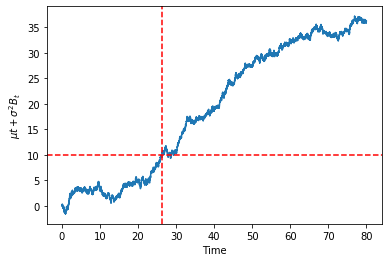

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(np.linspace(0,T,n),temp,'-')
plt.xlabel('Time')
plt.ylabel('$\mu t+\sigma^2B_t$')
plt.axvline(x=t, color='r', linestyle='--')
plt.axhline(y=a, color='r', linestyle='--')